## Introduction to Data Visualization & Line plots

### Coding assignment completed by - Om

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In this lab, we will focus on the Canadian immigration data.

![Data Preview](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%201/images/DataSnapshot.png)

The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01">here</a>.

***


The first half of the notebook contains code and guidance about Pandas, after that the data visualization using matplotlib starts.

In [56]:
# Import required libraries

%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
# Import the dataset using Pandas

df = pd.read_excel("Canada.xlsx", 
                   sheet_name='Canada by Citizenship', 
                   skiprows=range(20), 
                   skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
# Short summary or information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [4]:
df.index

RangeIndex(start=0, stop=195, step=1)

In [5]:
# Rename some columns to get better understanding

df.rename(columns={'OdName': 'Country', 
                   "AreaName": "Continent", 
                   "RegName": "Region"}, 
          inplace=True)

df.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df['Total'] = df.sum(axis=1)
df.head()

/var/folders/s3/dbk_7fz97w920m3grmvqvx8w0000gq/T/ipykernel_37969/3523948171.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1223,856,702,560,716,561,539,620,603,18433
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,2774
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,1,1,0,0,0,0,1,1,2749


In [7]:
# Get the total number of missing values 

print("Number of missing values in dataset: ", df.isnull().sum().sum())

Number of missing values in dataset:  0


In [8]:
df.describe()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,912.764103,1249.015385,901.753846,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,35930.984615
std,13.082835,1185.526885,0.431878,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,92040.242971
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2719.000000
25%,903.000000,914.000000,902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,3718.500000
50%,908.000000,922.000000,902.000000,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,8695.000000
75%,922.000000,925.500000,902.000000,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,24973.500000
max,935.000000,5501.000000,902.000000,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,699242.000000


### Pandas Intermediate - Indexing and Selection(Slicing)

#### Select Column

**There are two ways to filter on a column name:**

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.

```python
    df.column_name               # returns series
```

Method 2: More robust, and can filter on multiple columns.

```python
    df['column']                  # returns series
```

```python
    df[['column 1', 'column 2']]  # returns dataframe
```

***


#### Select Row

There are main 2 ways to select rows:

```python
    df.loc[label]    # filters by the labels of the index/column
    df.iloc[index]   # filters by the positions of the index/column
```



In [9]:
# Set the country column as the index column because, to get the full entry using index is not suitable for a large dataset

df.set_index('Country', inplace=True)
df.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,2749


In [10]:
df.loc["India"]

Type                 Immigrants
Coverage             Foreigners
AREA                        935
Continent                  Asia
REG                        5501
Region            Southern Asia
DEV                         902
DevName      Developing regions
1980                       8880
1981                       8670
1982                       8147
1983                       7338
1984                       5704
1985                       4211
1986                       7150
1987                      10189
1988                      11522
1989                      10343
1990                      12041
1991                      13734
1992                      13673
1993                      21496
1994                      18620
1995                      18489
1996                      23859
1997                      22268
1998                      17241
1999                      18974
2000                      28572
2001                      31223
2002                      31889
2003    

In [21]:
# Locate (row = India) and (column = 2013) from the dataframe

df.loc['India', '2013']

33087

In [22]:
# Convert each value in df.columns to String

df.columns = list(map(str, df.columns))

In [27]:
years = list(map(str, range(1980,2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


#### Filtering based on Criteria

To filter the dataset, we pass the condition as a boolean vector and get the output for the same.

In [38]:
# Display the data corresponding to a specific condition

asia_df = df[df['Continent'] == "Asia"]
asia_df.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Armenia,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,0,...,224,218,198,205,267,252,236,258,207,6069
Azerbaijan,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,0,...,359,236,203,125,165,209,138,161,57,5408
Bahrain,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,2,...,12,12,22,9,35,28,21,39,32,3234
Bangladesh,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,83,84,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,72906


In [39]:
print("Total Asian countries in survey: ", asia_df.shape[0])

Total Asian countries in survey:  49


## Data Visualization using Matplotlib

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).  As mentioned on their website:

> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.

### Matplotlib.Pyplot

>One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer.

### Pandas plotting
 Pandas has a built-in implementation of Matplotlib which is used to plot dataframes and series directly.

## Line Pots (Series/Dataframe) <a id="12"></a>

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a `Line` plot:

**Question:** Plot a line graph of immigration from Haiti using `df.plot()`.


In [50]:
# Extract the data for Haiti
# The years string list is useful here to get data

haiti = df.loc['Haiti', years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<AxesSubplot: >

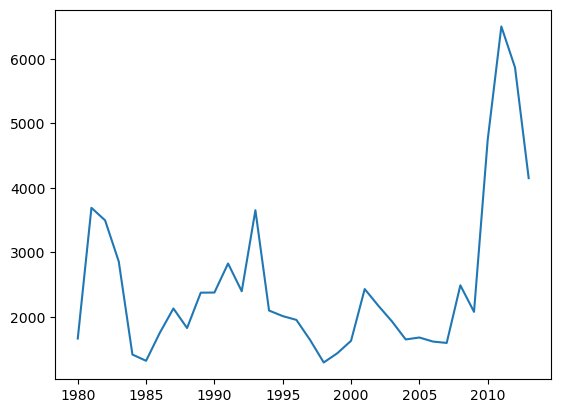

In [57]:
haiti.plot()

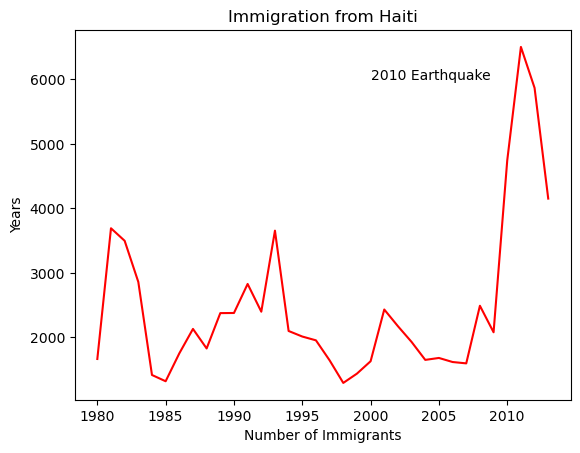

In [67]:
# Change the datatype of Haiti's Index to Integer

haiti.index = haiti.index.map(int)
haiti.plot(kind='line', color="red")

plt.title('Immigration from Haiti')
plt.xlabel("Number of Immigrants")
plt.ylabel("Years")

# Put a label at specific coordinates
plt.text(2000, 6000,"2010 Earthquake")
plt.show()

### Compare the dataset for China & India using Line Plots

Steps
<ol> 
    <li>Create a new dataframe with China and India's data</li>
    <li>View the dataframe generated</li>
    <li>Plot lineplot using the dataset</li>
</ol>

**df.plot(kind=”line”)** - This plots the index column on the X-axis & the each column as a different Line

In [98]:
df_IC = df.loc[['China', 'India'],years]
df_IC

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [99]:
df_IC = df_IC.transpose()
df_IC.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


<AxesSubplot: >

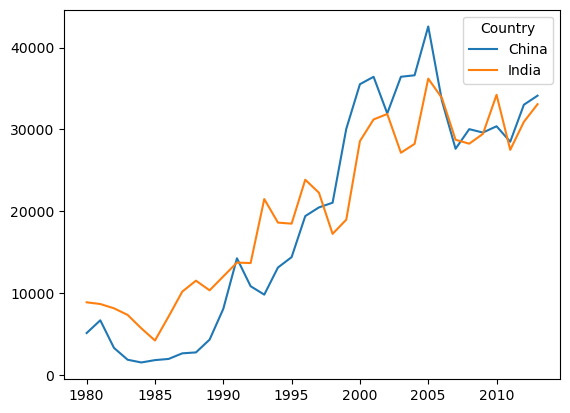

In [100]:
df_IC.plot(kind='line')

### Compare the trend of top 5 countries that contributed most to immigration of Canada

In [114]:
# Sort the dataframe according to the total immigrants in desc order
sorted_df = df.sort_values(by="Total", ascending=False)

# Get the first 5 rows of the sorted dataframe
sorted_df = sorted_df.head(5)
sorted_df = sorted_df[years]
sorted_df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


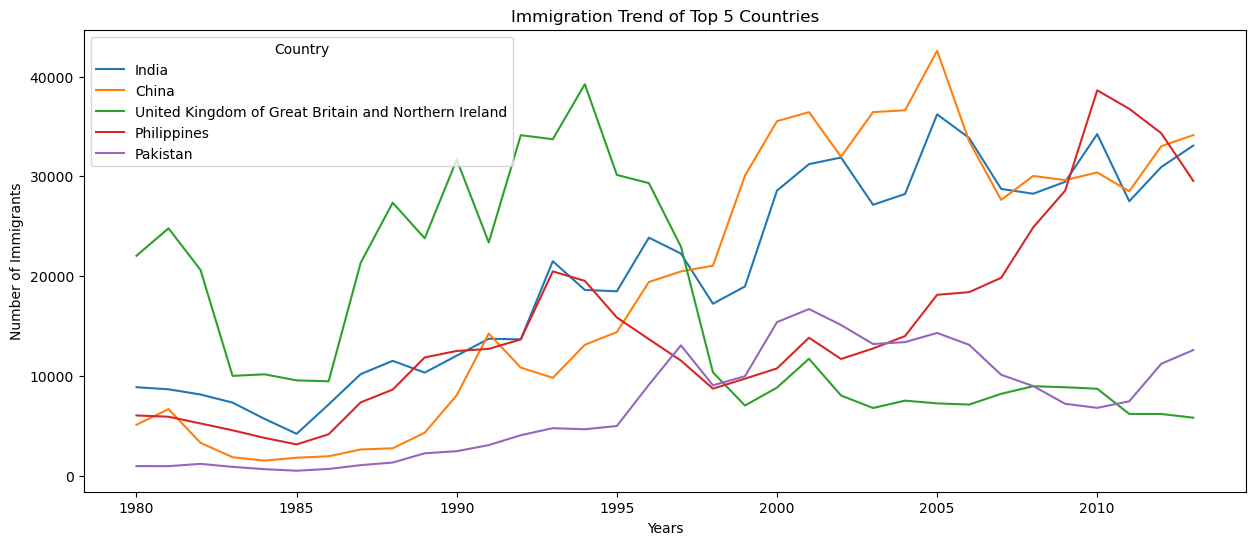

In [131]:
# Plot the trend of top 5 countries

sorted_df.transpose().plot(kind="line", figsize=(15,6))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()